# Сравнение KNN и SVM

In [6]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
import matplotlib as plt

## Генерация данных

In [7]:
def nearby_set(n_clusters=10, mindots=60, maxdots=500, distance = 0.8):
    X_data = np.array([np.array([]), np.array([])]).T
    y_data = np.array([])
    for i in range(0, int(n_clusters**0.5)):
        for j in range(0, int(n_clusters**0.5)):
            count = np.random.randint(mindots, maxdots)
            X = np.array([np.random.ranf(count)*distance + i, np.random.ranf(count)*distance + j]).T
            y = np.array([int(n_clusters**0.5)*i+j]*count)
            X_data = np.concatenate((X_data, X))
            y_data = np.concatenate((y_data, y))
    for i in range(0, n_clusters - int(n_clusters**0.5)**2):
        count = np.random.randint(mindots, maxdots)
        X = np.array([np.random.ranf(count)*distance + int(n_clusters**0.5), np.random.ranf(count)*distance + i]).T
        y = np.array([int(n_clusters**0.5)**2+i]*count)
        X_data = np.concatenate((X_data, X))
        y_data = np.concatenate((y_data, y))
    return X_data, y_data


def included_set(n_clusters=10, mindots=30, maxdots=150, offset=0):
    X_data = np.array([np.array([]), np.array([])]).T
    y_data = np.array([])
    for i in range(1, n_clusters + 1):
        count = np.random.randint(mindots*i*i, maxdots*i*i)
        X = np.array([(np.random.ranf(count) - 0.5)*i, (np.random.ranf(count) - 0.5)*i]).T
        y = np.array([i-1]*count)
        Xy = np.concatenate((X, np.array([y]).T), axis = 1)
        Xy = Xy[(abs(X.T[0]) >= i/2 - 0.5 - offset) + (abs(X.T[1]) >= i/2 - 0.5 - offset)].T
        X = np.array([Xy[0], Xy[1]]).T
        y = Xy[2]
        X_data = np.concatenate((X_data, X))
        y_data = np.concatenate((y_data, y))
    return X_data, y_data

# Сравние алгоритмов с непересекающимися, невложенными данными

## KNN

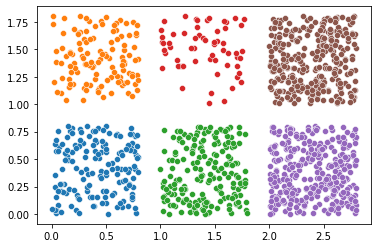

In [8]:
X, y = nearby_set(n_clusters=6, distance = 0.8)
for i in range (0, 6):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])

# sb.scatterplot(x = X.T[0], y = X.T[1])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
knn = KNeighborsClassifier(n_neighbors = 25)
start_time = time.time()
knn.fit(x_train, y_train)
print(f"Error: {mse(knn.predict(x_test), y_test)}")
print(f"Execution time: {time.time()-start_time}")

Error: 0.004166666666666667
Execution time: 0.0809931755065918


Увеличивая количество соседей, метрика начинает увеличиваться, из чего следует алгоритм при обработке непересекающихся данных работает лучше при малом количестве рассматриваемых соседей

## SVM

In [11]:
from sklearn.svm import SVC

In [12]:
svm = SVC(kernel='linear')
start_time = time.time()
svm.fit(x_train, y_train)
print(f"Error: {mse(svm.predict(x_test), y_test)}")
print(f"Execution time: {time.time()-start_time}")

Error: 0.004166666666666667
Execution time: 0.027995824813842773


Таким образом, мы видим, точность одинакова с KNN. Однако время выполнения сократилось.

# Сравнение алгоритмов с вложенными данными

## KNN

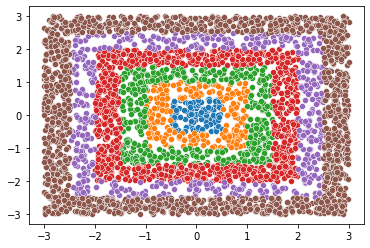

In [16]:
X, y = included_set(n_clusters=6)
for i in range (0, 6):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
knn = KNeighborsClassifier(n_neighbors = 5)
start_time = time.time()
knn.fit(x_train, y_train)
print(f"Error: {mse(knn.predict(x_test), y_test)}")
print(f"Execution time: {time.time()-start_time}")

Error: 0.06161745827984596
Execution time: 0.15400099754333496


При обработке вложенных данных, увеличилось время исполнения. Также уменьшилась точность. Однако это поправимо уменьшение количества ближайший соседей, которые мы проверяем

## SVM

In [20]:
svm = SVC(kernel='linear')
start_time = time.time()
svm.fit(x_train, y_train)
print(f"Error: {mse(svm.predict(x_test), y_test)}")
print(f"Execution time: {time.time()-start_time}")

Error: 3.766367137355584
Execution time: 1.172006607055664


Как мы видим, точность алгоритм SVM значительно уменьшилась по сравнению с предыдущим тестом. Помимо этого, сильно возросло время исполнения

# Сравнение алгоритмов с невложенными пересекающимися данными

## KNN

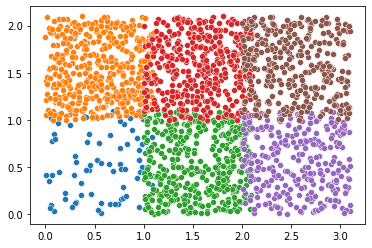

In [24]:
X, y = nearby_set(n_clusters=6, distance = 1.1)
for i in range (0, 6):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5)
start_time = time.time()
knn.fit(x_train, y_train)
print(f"Error: {mse(knn.predict(x_test), y_test)}")
print(f"Execution time: {time.time()-start_time}")

Error: 0.3178294573643411
Execution time: 0.06197476387023926


Мы видим, что немного снизилась точность при пересечении данных

## SVM

In [27]:
svm = SVC(kernel='linear')
start_time = time.time()
svm.fit(x_train, y_train)
print(f"Error: {mse(svm.predict(x_test), y_test)}")
print(f"Execution time: {time.time()-start_time}")

Error: 0.2971576227390181
Execution time: 0.04900240898132324


В данном случае данный алгоритм работает немного лучше, чем KNN. Однако, наблюдается снижение точности и увеличение времени выполнения при пересекающихся данных

# Сравнение алгоритм на вложенных и пересекающихся данных

## KNN

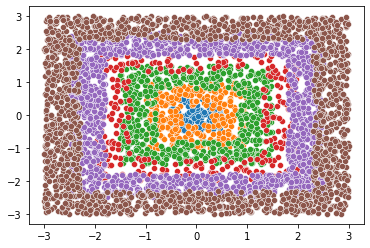

In [29]:
X, y = included_set(n_clusters=6, offset = 0.2)
for i in range (0, 6):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])

In [32]:
knn = KNeighborsClassifier(n_neighbors = 6)
start_time = time.time()
knn.fit(x_train, y_train)
print(f"Error: {mse(knn.predict(x_test), y_test)}")
print(f"Execution time: {time.time()-start_time}")

Error: 0.3023255813953488
Execution time: 0.0810084342956543


В данном случае, результат такой же, как и во невложенных пересекающихся данных

## SVM

In [31]:
svm = SVC(kernel='linear')
start_time = time.time()
svm.fit(x_train, y_train)
print(f"Error: {mse(svm.predict(x_test), y_test)}")
print(f"Execution time: {time.time()-start_time}")

Error: 0.2971576227390181
Execution time: 0.047980546951293945


Результат для этого алгоритма так же не изменились.

# Отчет:

Как показывают тесты, алгоритм KNN работает эффективнее чем SVM в большинстве случаев. Однако, при пересекающихся вложенных данных SVM анализирует информацию немного эффективнее. Данная программа, благодаря различным тестам, позволяет убедиться в такой оценке.